In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("../outputs/cleaned_data.csv")

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Weekday,Hour,Revenue,TransactionType
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,Tuesday,7,83.4,Purchase
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,Tuesday,7,81.0,Purchase
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,Tuesday,7,81.0,Purchase
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,Tuesday,7,100.8,Purchase
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,Tuesday,7,30.0,Purchase


In [2]:
df.describe()

,Quantity,Price,Customer ID,Year,Month,Day,Hour,Revenue
count,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504,2010.422410,7.501498,15.201500,12.810876,20.195317
std,188.976099,70.241388,1697.464450,0.566598,3.448798,8.694601,2.302335,308.685001
min,-80995.000000,0.000000,12346.000000,2009.000000,1.000000,1.000000,6.000000,-168469.600000
25%,2.000000,1.250000,13975.000000,2010.000000,5.000000,8.000000,11.000000,4.250000
50%,5.000000,1.950000,15255.000000,2010.000000,8.000000,15.000000,13.000000,11.250000
75%,12.000000,3.750000,16797.000000,2011.000000,11.000000,23.000000,14.000000,19.500000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,21.000000,168469.600000


In [3]:
df['Customer ID'].nunique()

5942

In [4]:
df['Country'].nunique()

41

In [5]:
df['Country'].value_counts().head()

Country
United Kingdom    741301
Germany            17624
EIRE               16195
France             14202
Netherlands         5140
Name: count, dtype: int64

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

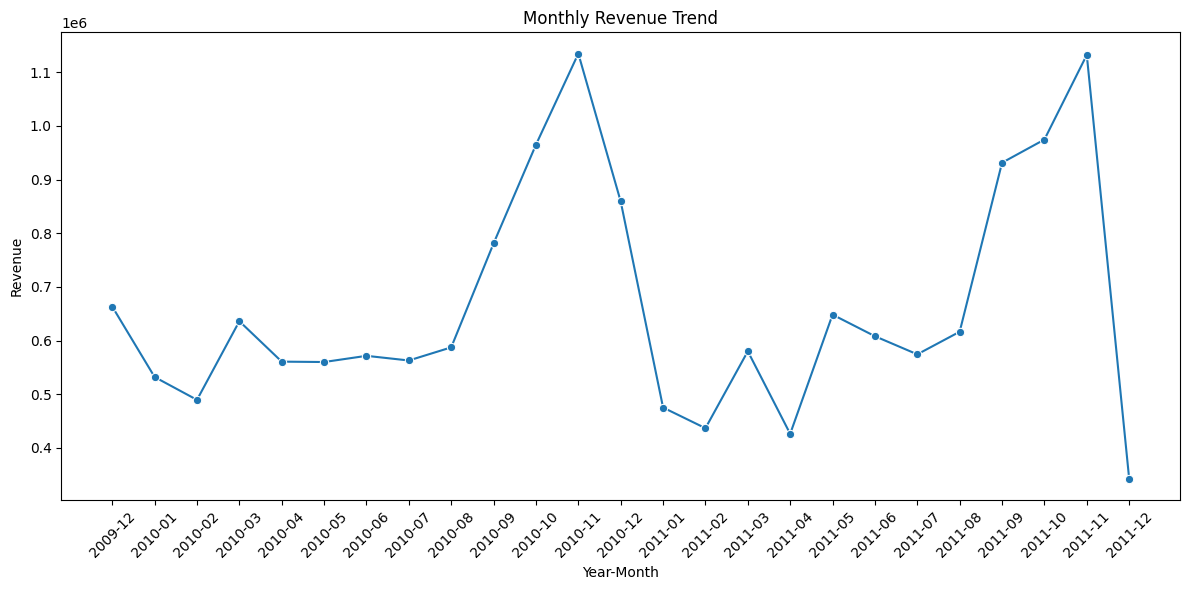

In [8]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()

monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


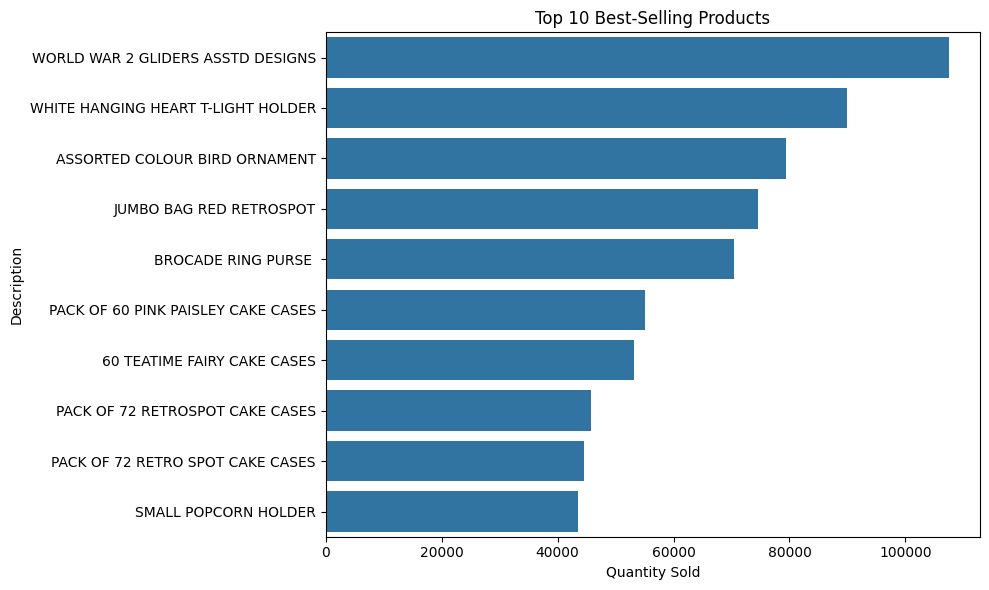

In [9]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.tight_layout()
plt.show()

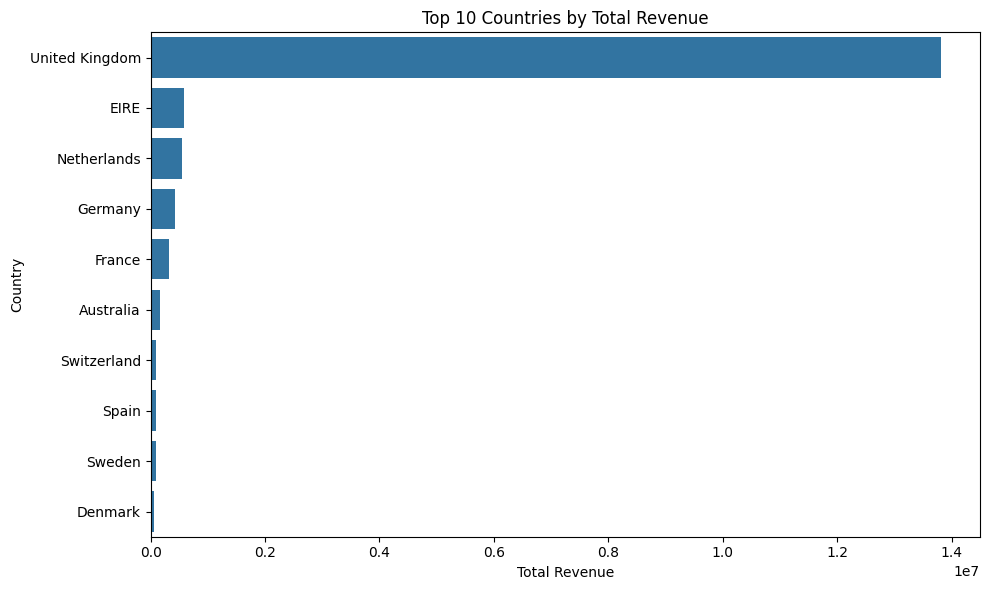

In [10]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_revenue, x='Revenue', y='Country')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### 🌍 Top 10 Countries by Total Revenue

This bar chart displays the top 10 countries by total revenue generated from online retail transactions. As expected, **United Kingdom** dominates the revenue figures, contributing the vast majority of total sales. This is consistent with the nature of the dataset, which is UK-centric.

Other notable contributors include:
- **Ireland (EIRE)**
- **Netherlands**
- **Germany**
- **France**

These insights suggest that international sales, although present, are much smaller in volume compared to domestic (UK-based) sales. In future dashboards or strategy discussions, UK may require separate handling to avoid skewing global trends.

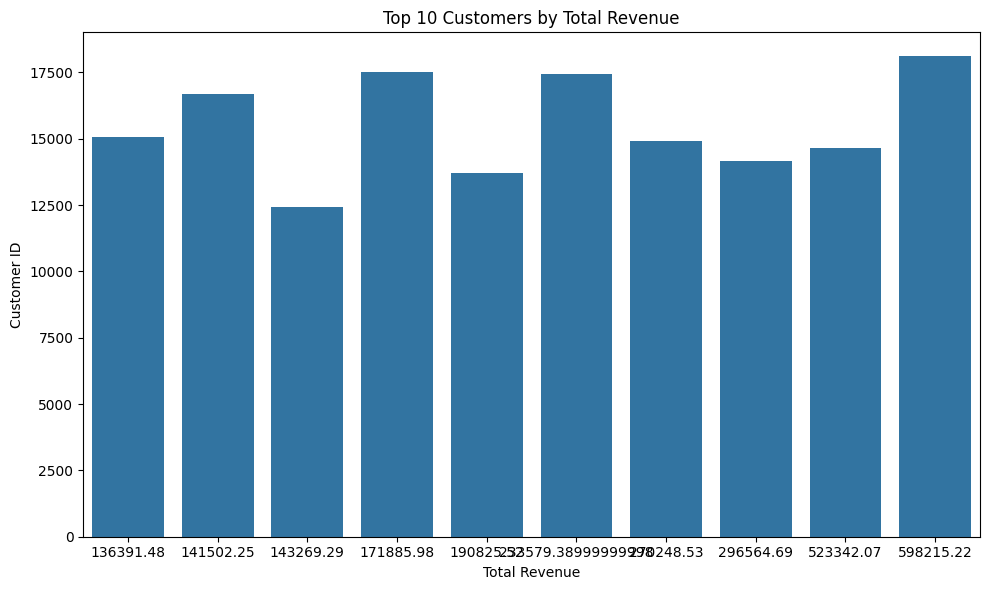

In [11]:
top_customers = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

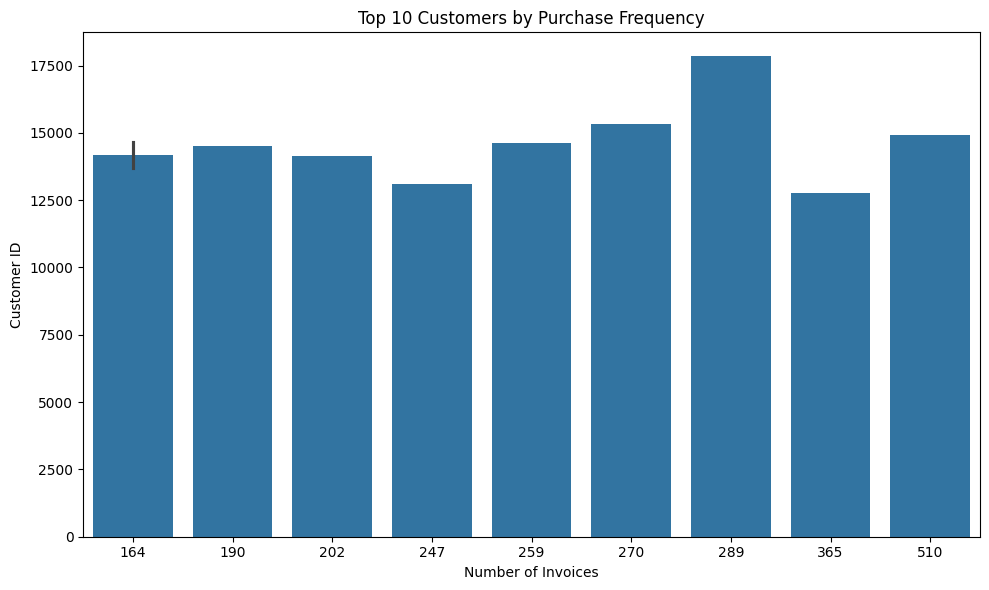

In [12]:
top_frequency = df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_frequency.values, y=top_frequency.index)
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Number of Invoices')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

### 👥 Top 10 Customers Analysis

These two bar charts highlight the most valuable customers based on two different metrics:

#### 💸 Total Revenue
The first chart shows the **top 10 customers by total revenue**. These are the individuals who have spent the most across all their transactions. They are likely to be loyal and high-value customers — potential candidates for premium offers or loyalty programs.

#### 🔁 Purchase Frequency
The second chart shows the **top 10 customers by number of invoices**, indicating how frequently they shop. Some of these customers may not generate the highest revenue per transaction, but their consistent activity suggests strong engagement and potential for long-term value.

📌 Observations:
- Several customers appear in both charts — a sign of both frequent and high-value behavior.
- These customers could be further analyzed via RFM segmentation.

In [13]:
invoice_revenue = df.groupby('Invoice')['Revenue'].sum()

average_order_value = invoice_revenue.mean()
print(f"Average Order Value: {average_order_value:.2f}")


Average Order Value: 370.98


### 🧺 Average Order Value (AOV)

The **Average Order Value** (AOV) represents the average amount spent per transaction (invoice) across the dataset.

- **AOV = 370.98**

This means that, on average, each customer spends approximately **£371** per order. This metric is helpful for understanding purchasing behavior and setting expectations for revenue per transaction.

🔍 **Note:** Although the dataset may contain some very large or very small invoices, AOV provides a good central tendency for overall transaction value. For deeper insight, outlier analysis or segmentation by country/product may be explored in future steps.

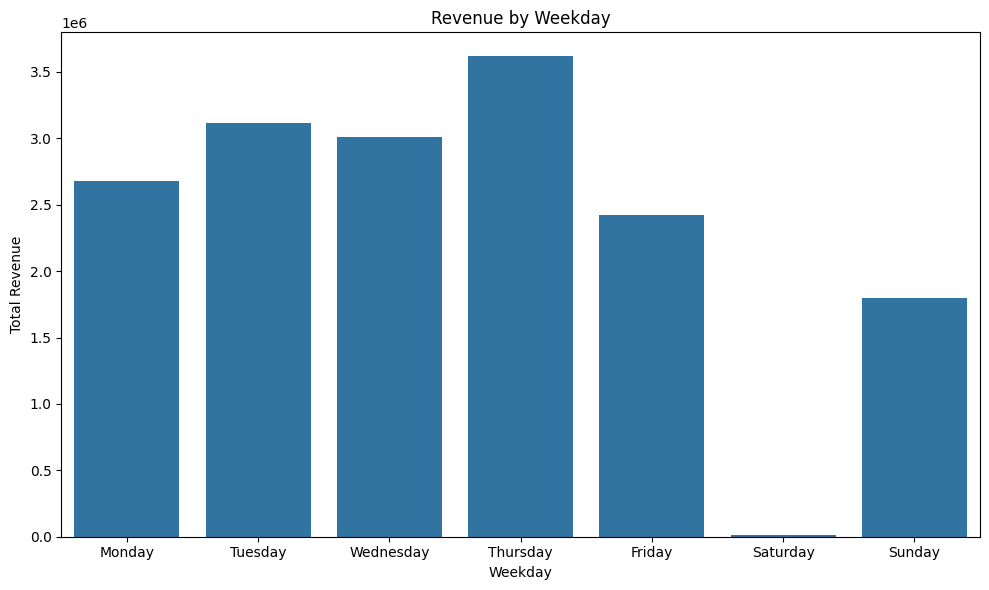

In [14]:
weekday_revenue = df.groupby('Weekday')['Revenue'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_revenue.index, y=weekday_revenue.values)
plt.title('Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


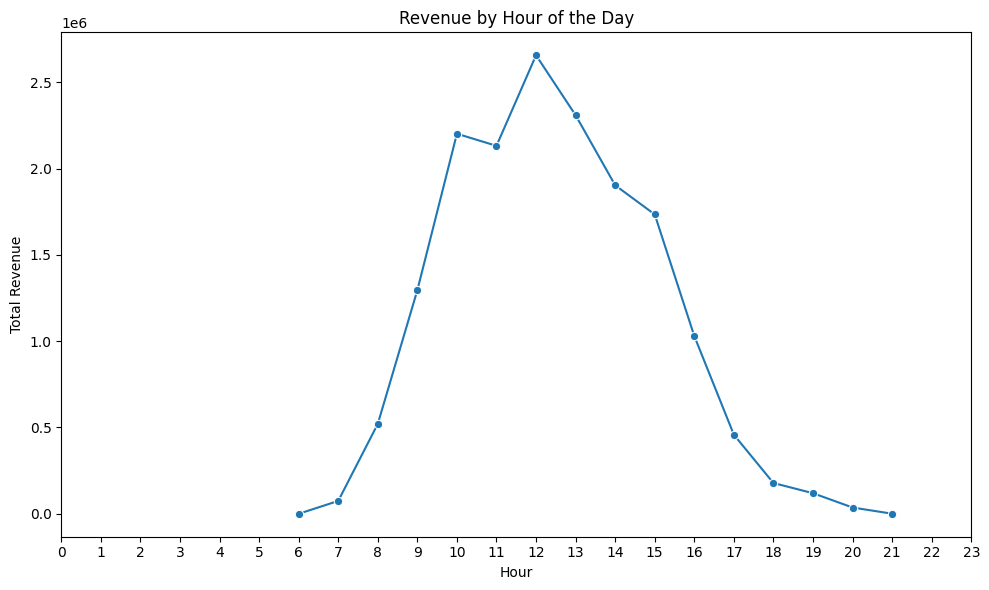

In [15]:
hourly_revenue = df.groupby('Hour')['Revenue'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o')
plt.title('Revenue by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


## ⏰ Temporal Patterns in Revenue

These visualizations reveal how revenue fluctuates across **days of the week** and **hours of the day**, offering insights into customer shopping behavior.

---

### 🗓 Revenue by Weekday

| Weekday     | Insight                                  |
|-------------|-------------------------------------------|
| **Thursday** | Highest revenue overall — peak shopping day. |
| **Tuesday & Wednesday** | Strong performance, close to the weekly peak. |
| **Monday & Friday** | Moderate revenue levels. |
| **Saturday** | ⚠️ Extremely low revenue — nearly flat. |
| **Sunday** | Lowest after Saturday. |

**🔎 Interpretation:**
- Revenue is concentrated on **weekdays**, especially mid-week.
- **Weekends**, particularly **Saturday**, show minimal transaction activity.
- Indicates weekday-oriented customer behavior, possibly influenced by work patterns.

---

### 🕐 Revenue by Hour of the Day

| Hour Range     | Observation                              |
|----------------|-------------------------------------------|
| **6–8 AM**     | Minimal activity.                         |
| **8–12 PM**    | 🔺 Sharp increase in revenue.             |
| **12–1 PM**    | ⏰ **Revenue peak** — likely during lunch breaks. |
| **1–4 PM**     | Gradual decline, but still active.        |
| **After 4 PM** | ⬇️ Steep drop — very low evening activity. |

**🔎 Interpretation:**
- Revenue is concentrated during **working hours**, especially late morning and early afternoon.
- Minimal sales occur **after business hours**, suggesting a time-sensitive shopping pattern.

---

### ✅ Strategic Takeaways

- 🕑 **Target ads** during **weekday mornings and lunch hours**.
- 👥 **Optimize staffing** and operations around **midday weekday peaks**.
- 📉 **Reduce resource allocation** on **weekends and evenings**, when engagement is minimal.


In [16]:
return_rate = df['TransactionType'].value_counts(normalize=True)
print(return_rate)

TransactionType
Purchase    0.977262
Return      0.022738
Name: proportion, dtype: float64


In [17]:
total_revenue = df[df['TransactionType'] == 'Purchase']['Revenue'].sum()
total_returns = df[df['TransactionType'] == 'Return']['Revenue'].sum()

return_percentage = total_returns / (total_revenue + total_returns)
print(f"Return revenue ratio: {return_percentage:.2%}")

Return revenue ratio: -6.58%


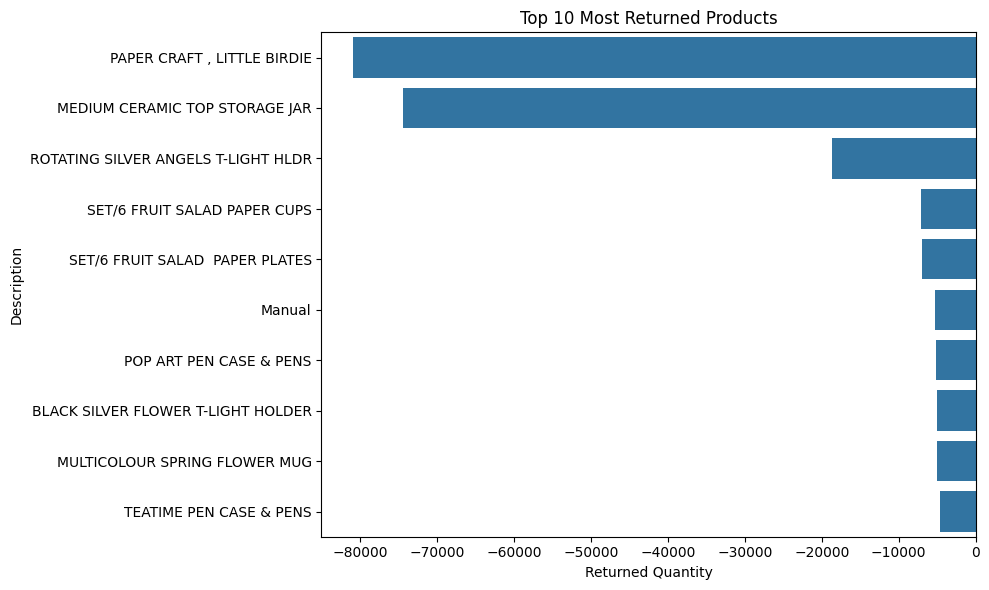

In [18]:
top_returns = df[df['TransactionType'] == 'Return'].groupby('Description')['Quantity'].sum().sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_returns.values, y=top_returns.index)
plt.title("Top 10 Most Returned Products")
plt.xlabel("Returned Quantity")
plt.tight_layout()
plt.show()

## 🔄 Return (Product Return) Analysis

This section analyzes return transactions (marked as `Return` in `TransactionType`) to understand their impact on sales and product behavior.

---

### 📊 1. Return Rate

- **Returns make up 2.27% of all transactions.**
- While this is a relatively small share, returns can still erode profitability and signal product-related issues.

---

### 💸 2. Return Revenue Ratio

- **Returned revenue accounts for -6.58% of total revenue.**
- This indicates that over **6.5% of gross income** is lost due to returns.
- Returns are represented with **negative quantities**, which reduce total revenue — this is expected behavior in the data model.

---

### 📦 3. Top 10 Most Returned Products

The chart below shows the 10 most returned products by total returned quantity:

- `PAPER CRAFT, LITTLE BIRDIE`
- `MEDIUM CERAMIC TOP STORAGE JAR`
- `ROTATING SILVER ANGELS T-LIGHT HLDR`
- Other frequently returned items include decorative paper goods, light holders, and stationery.

These products may require:
- Quality checks,
- Improved product descriptions,
- Packaging enhancements,
- Or clearer usage expectations.

---

📌 **Next Steps**:
- Analyze returns by **country**, **customer**, or **season**.
- Investigate whether these returns are concentrated among a few customers or widespread.
- Evaluate if return-prone products correlate with higher price points or specific product categories.

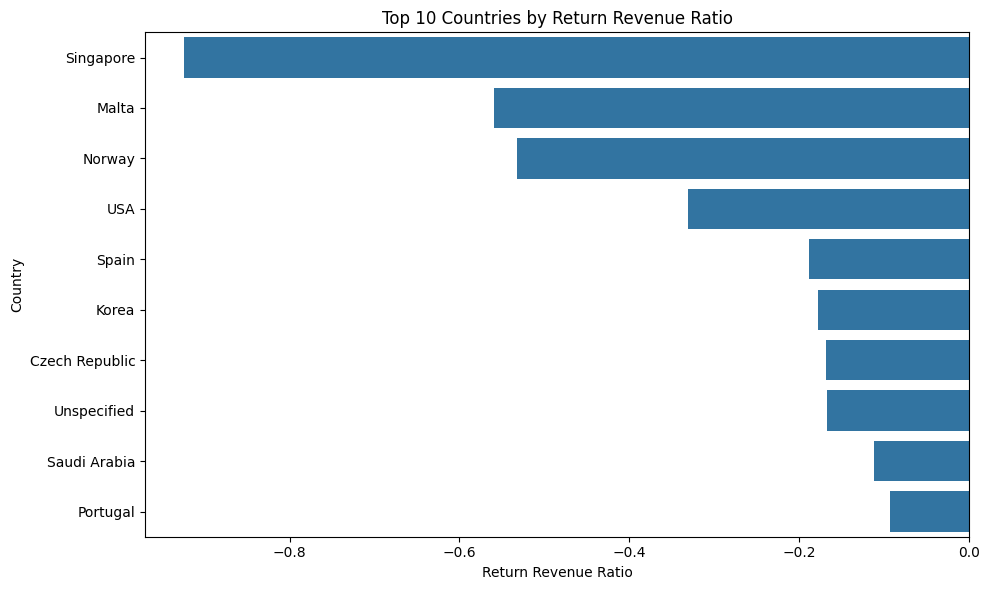

In [28]:
returns_by_country = df[df['TransactionType'] == 'Return'].groupby('Country')['Revenue'].sum()
purchases_by_country = df[df['TransactionType'] == 'Purchase'].groupby('Country')['Revenue'].sum()

# Return Revenue Ratio hesaplanıyor (hala negatif bir sayı olacak)
return_ratio = (returns_by_country / (returns_by_country + purchases_by_country)).dropna()

# En büyük iade oranına sahip ülkeler = En negatif oranlar
top_return_countries = return_ratio.sort_values().head(10)  # ascending=True varsayılan zaten

# Görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x=top_return_countries.values, y=top_return_countries.index)
plt.title("Top 10 Countries by Return Revenue Ratio")
plt.xlabel("Return Revenue Ratio")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## 🌍 Return Behavior by Country

This chart highlights the **top 10 countries with the highest return revenue ratios**, calculated as:

> Returned Revenue / (Returned Revenue + Purchase Revenue)

These countries represent the most return-heavy segments in terms of **revenue impact**, not just quantity.

---

### 📊 Key Observations

| Country              | Notable Pattern                                                |
|----------------------|----------------------------------------------------------------|
| **Singapore**         | Extremely high return ratio — possibly only return, no purchases. |
| **Malta & Norway**    | Significant return share, suggesting transactional imbalance.     |
| **USA & Spain**       | High return ratios may point to regional shipping or product fit issues. |
| **Korea & Czech Rep.**| Moderate but notable return behavior — worth monitoring.          |
| **Saudi Arabia & Portugal** | Return-heavy countries despite potentially smaller volumes.   |
| **Unspecified**       | May indicate data quality issues (missing country info).        |

---

### ⚠️ Interpretation

- Countries like **Singapore** and **Malta** likely had **returns with little or no purchases**, inflating return ratio.
- **Unspecified** entries suggest that some transactions may be missing country metadata — possibly due to data entry or system issues.
- Return-heavy countries may reflect:
  - Product misunderstanding or unmet expectations
  - Delivery/logistics challenges
  - Cultural differences in return tolerance

---

### 📌 Recommendations

- Investigate whether these countries had **disproportionate return activity by a few customers** or across broader segments.
- Check for **specific products** or categories common among these returns.
- Improve **localized descriptions**, **expectation setting**, or packaging for high-return regions.
- Consider **excluding purely return-only countries** in operational dashboards unless contextually justified.

Top Countries by Return Revenue Ratio: ['Singapore', 'Malta', 'Norway', 'USA', 'Spain']


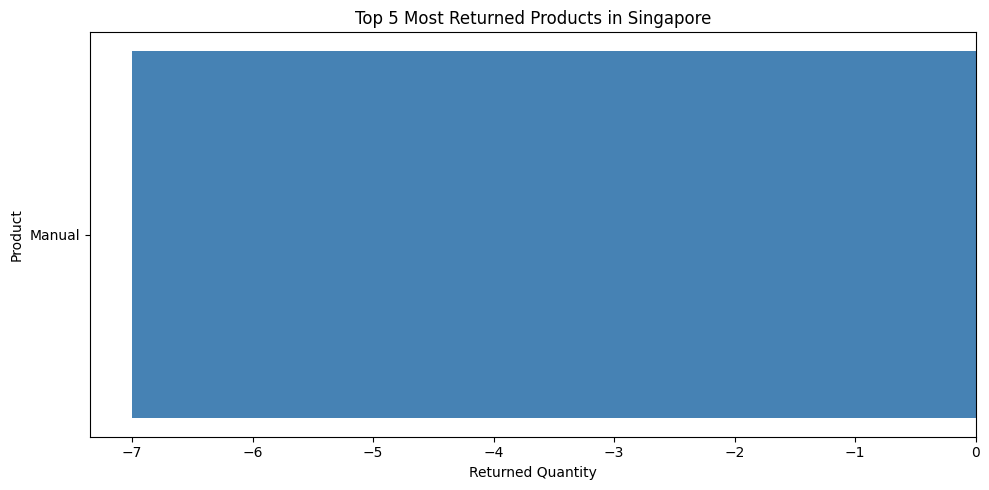

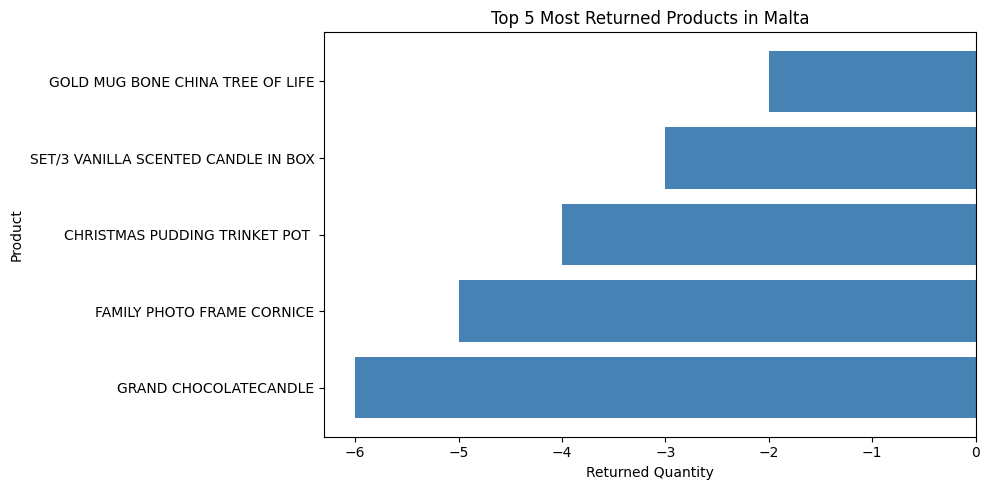

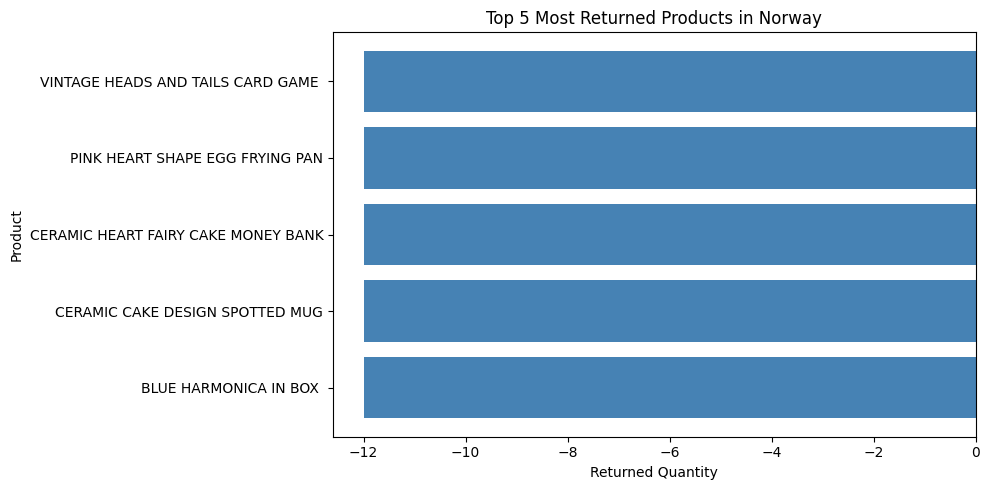

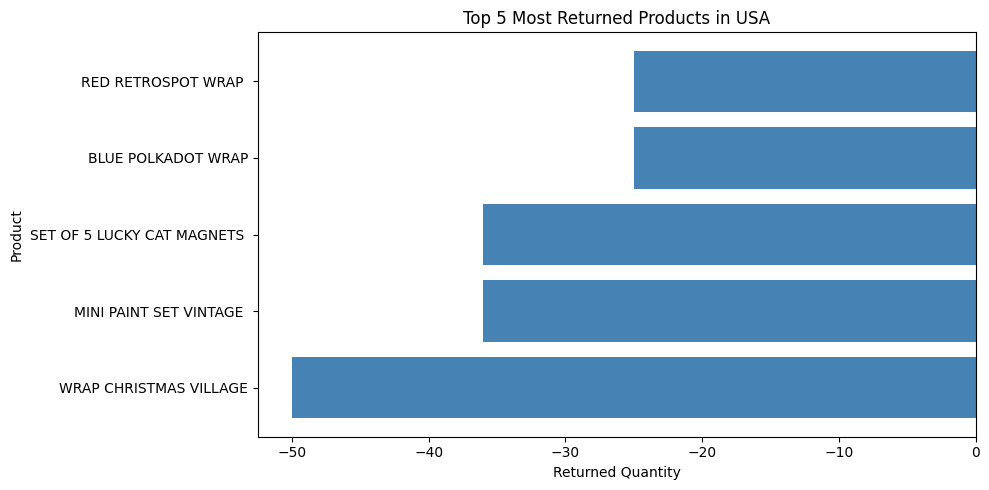

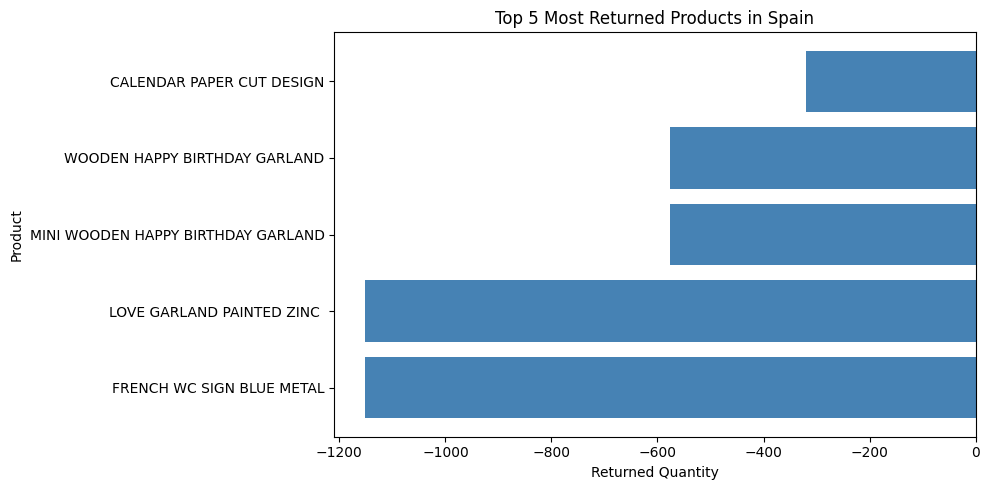

In [29]:
import matplotlib.pyplot as plt

# 1. Return ve Purchase Revenue'ları grup bazında al
returns_by_country = df[df['TransactionType'] == 'Return'].groupby('Country')['Revenue'].sum()
purchases_by_country = df[df['TransactionType'] == 'Purchase'].groupby('Country')['Revenue'].sum()

# 2. Return revenue ratio (negatif değerler olacak)
return_ratio = (returns_by_country / (returns_by_country + purchases_by_country)).dropna()

# 3. En yüksek iade oranına sahip ilk 5 ülkeyi al
top_countries = return_ratio.sort_values().head(5).index.tolist()
print("Top Countries by Return Revenue Ratio:", top_countries)

# 4. Sadece 'Return' işlemleri
returns_df = df[df['TransactionType'] == 'Return']

# 5. Ülke ve ürün bazında toplam iade miktarını hesapla
country_product_returns = (
    returns_df
    .groupby(['Country', 'Description'])['Quantity']
    .sum()
    .reset_index()
)

# 6. Her ülke için en çok iade edilen 5 ürünü çiz
top_n = 5

for country in top_countries:
    subset = country_product_returns[country_product_returns['Country'] == country]
    top_returns = subset.sort_values('Quantity').head(top_n)

    if top_returns.empty:
        continue

    plt.figure(figsize=(10, 5))
    plt.barh(top_returns['Description'], top_returns['Quantity'], color='steelblue')
    plt.title(f'Top {top_n} Most Returned Products in {country}')
    plt.xlabel('Returned Quantity')
    plt.ylabel('Product')
    plt.tight_layout()
    plt.show()

## 📦 Top Returned Products in High Return Ratio Countries

The following visualizations show the **top 5 most returned products** by quantity for each of the top 5 countries with the highest return revenue ratios.

These breakdowns help pinpoint which specific items are driving return losses in each region.

---

### 🇸🇬 Singapore

- Only one product was returned: **"Manual"**, and in a very small quantity.
- This may indicate:
  - A **data entry artifact** or a placeholder item.
  - A rare or isolated incident — Singapore had **no purchases**, so return ratio appeared extremely high.

📌 **Suggestion:** Review data source for “Manual” — possibly system-generated.

---

### 🇲🇹 Malta

- The most returned items are **giftware and decorative products**, including candles and trinket pots.
- Quantities are low but distributed across multiple fragile items.

📌 **Suggestion:** Ensure **product packaging and handling** meets expectations — candles and ceramics are prone to breakage or dissatisfaction.

---

### 🇳🇴 Norway

- Five different novelty or household items were returned, all in **equal and very low quantities**.
- This may point to:
  - A **test order** or sample returns.
  - Very low sales volume overall, which inflates the ratio.

📌 **Suggestion:** Monitor Norway for future return trends — no product stands out, but the market may be unstable or niche.

---

### 🇺🇸 USA

- The returned items include **stationery, art kits, and seasonal wrap**, mostly **in high volume**.
- “WRAP CHRISTMAS VILLAGE” stands out with over **50 returns**.

📌 **Suggestion:** These may reflect **seasonal overstock returns** or unmet expectations around visual design. Consider improving **visual descriptions** for gift wrap products.

---

### 🇪🇸 Spain

- **Massive return quantities** of decorative signage and garlands, with some items exceeding **1000 units** in returns.
- These products are most likely **bulk ordered**, possibly for events or retailers.

📌 **Suggestion:** Investigate whether these returns are tied to **B2B customers**, seasonal unsold stock, or product quality issues (e.g., durability, size, or visual fidelity).
